In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

```yaml
nAgents: 10000
nSteps: 1000000
nSaveSteps: 1000
nRuns: 1000
networkP: 0.8
networkM: 10
additionalLinksFraction: 0.01
virtualLayer: true
epidemicLayer: true
comorbidities: false
qVoterParameters:
  p: 0.01
  q: 6
epidemicLayerParameters:
  beta: 0.1
  gamma: 0.5
  mu: 0.9
  kappa: 0.1
maxInfectedTimeMean: 10
maxInfectedTimeStd: 5
positiveOpinionFraction: 1.0
infectedFraction: 0.1
fractionIllnessA: 0.0
fractionIllnessB: 0.0
outputFolder: simulations/results_qvoter_and_epidemic
firstParameterRange:
  start: 0.0
  end: 1.0
  count: 51
  vals: [ 0.0, 0.25, 0.5, 0.75, 1.0 ]
  type: positiveOpinionFraction
secondParameterRange: null
linksRemoval: false
nQVoterPerStep: 1

```


In [2]:
%%time

def load_df(p, fracPos, nagents=10000, nsteps=1000000, nruns=1000):
    dfs_low = []
    dfs_high = []
    dfs_middle = []
    for n in range(nruns):
        path = f"../simulations/results_qvoter_and_epidemic/_NAGENTS={nagents}_NSTEPS={nsteps}_NETWORKP=0.8_FRAC_LINKS=0.01_FRAC_POS_OPINION={fracPos}_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q=6_EPIDEMIC=beta=0.10_gamma=0.50_mu=0.90_kappa=0.10_I_TIME_MEAN=10.0_I_TIME_STD=5.0_NRUN={n}.tsv"
        df = pd.read_csv(path, sep="\t")
        if np.any(df['meanOpinion'] > 0.9):
            dfs_high.append(df)
        elif np.any(df['meanOpinion'] < -0.9):
            dfs_low.append(df)
        else:
            dfs_middle.append(df)
            
    dfs1_low = pd.DataFrame()
    dfs1_middle = pd.DataFrame()
    dfs1_high = pd.DataFrame()
            
    if len(dfs_low) > 0:
        print(len(dfs_low))
        dfs1_low = pd.DataFrame(np.array([x.to_numpy() for x in dfs_low]).mean(axis=0), 
                                index=df.index, columns=df.columns)
    if len(dfs_middle) > 0:
        print(len(dfs_low))
        dfs1_middle = pd.DataFrame(np.array([x.to_numpy() for x in dfs_middle]).mean(axis=0), 
                                index=df.index, columns=df.columns)
    if len(dfs_high) > 0:
        print(len(dfs_high))
        dfs1_high = pd.DataFrame(np.array([x.to_numpy() for x in dfs_high]).mean(axis=0), 
                                 index=df.index, columns=df.columns)
    
    return dfs1_low, dfs1_middle, dfs1_high


p = 0.01
fracPos = 0.5


df_low_050, df_middle_050, df_high_050 = load_df(p, '0.5', nruns=1000)
df_low_075, df_middle_075, df_high_075 = load_df(p, '0.75', nruns=1000)
df_low_025, df_middle_025, df_high_025 = load_df(p, '0.25', nruns=1000)


327
327
354
1000
1000
CPU times: user 29.6 s, sys: 540 ms, total: 30.1 s
Wall time: 30.1 s


In [3]:
colormap = plt.cm.get_cmap('viridis', 3)
colors = [colormap(i) for i in range(3)]

def print_run(dfs, labels, col, ylim=(-0.1, 1.1), xlim=(-1, 40), title=''):
    for i, df in enumerate(dfs):
        if 'step' in df.columns:
            plt.plot(df.step / 10000, df[col], label=fr'{labels[i]}', color=colors[i])
        else:
            plt.plot(label=fr'{labels[i]}', color=colors[i])
    plt.xlabel("time")
    plt.ylim(*ylim)
    plt.xlim(*xlim)
    plt.legend()
    plt.ylabel(col)

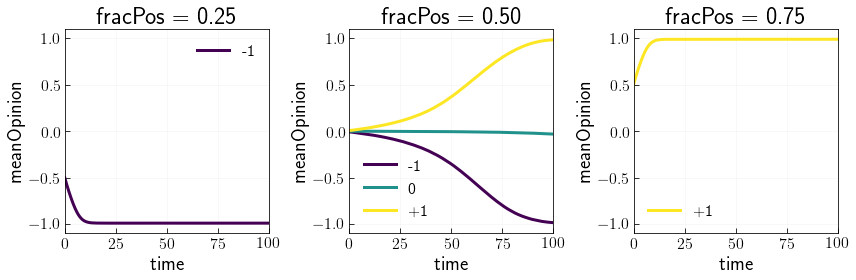

In [4]:
labels = ['-1', '0', '+1']

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
print_run([df_low_025, df_middle_025, df_high_025], labels, 'meanOpinion', ylim=(-1.1, 1.1), xlim=(0, 100))
plt.title('fracPos = 0.25')

plt.subplot(1, 3, 2)
print_run([df_low_050, df_middle_050, df_high_050], labels, 'meanOpinion', ylim=(-1.1, 1.1), xlim=(0, 100))
plt.title('fracPos = 0.50')

plt.subplot(1, 3, 3)
print_run([df_low_075, df_middle_075, df_high_075], labels, 'meanOpinion', ylim=(-1.1, 1.1), xlim=(0, 100))
plt.title('fracPos = 0.75')
plt.tight_layout()

W przypadku kiedy jest początkowo 25% pozytywnych opinii zbiegamy za każdym razem do -1. Dla 75% pozytywnych opinii do +1. Natomiast kiedy startujemy ze stanu losowego to albo zbiegamy do +1, -1 lub średnia opinia zostaje w okolicach zera.

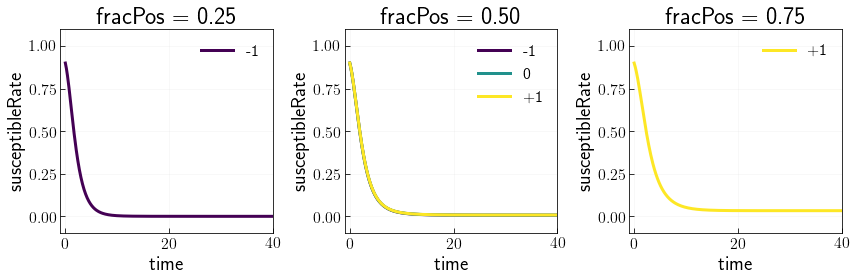

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
print_run([df_low_025, df_middle_025, df_high_025], labels, 'susceptibleRate')
plt.title('fracPos = 0.25')

plt.subplot(1, 3, 2)
print_run([df_low_050, df_middle_050, df_high_050], labels, 'susceptibleRate')
plt.title('fracPos = 0.50')

plt.subplot(1, 3, 3)
print_run([df_low_075, df_middle_075, df_high_075], labels, 'susceptibleRate')
plt.title('fracPos = 0.75')
plt.tight_layout()

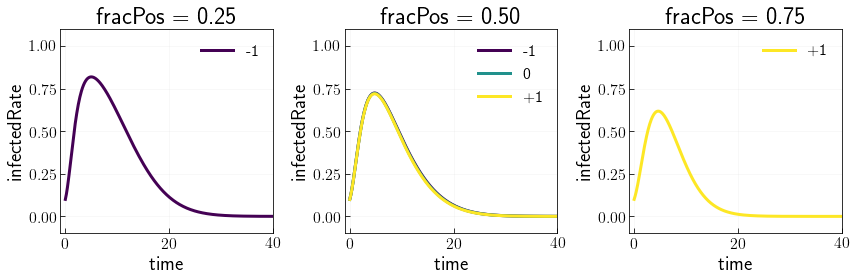

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
print_run([df_low_025, df_middle_025, df_high_025], labels, 'infectedRate')
plt.title('fracPos = 0.25')

plt.subplot(1, 3, 2)
print_run([df_low_050, df_middle_050, df_high_050], labels, 'infectedRate')
plt.title('fracPos = 0.50')

plt.subplot(1, 3, 3)
print_run([df_low_075, df_middle_075, df_high_075], labels, 'infectedRate')
plt.title('fracPos = 0.75')
plt.tight_layout()

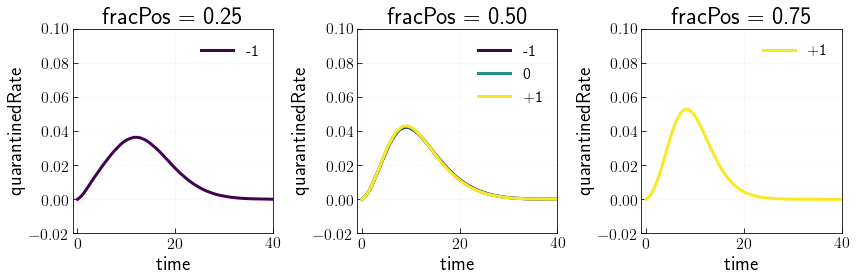

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
print_run([df_low_025, df_middle_025, df_high_025], labels, 'quarantinedRate', ylim=(-0.02, 0.1))
plt.title('fracPos = 0.25')

plt.subplot(1, 3, 2)
print_run([df_low_050, df_middle_050, df_high_050], labels, 'quarantinedRate', ylim=(-0.02, 0.1))
plt.title('fracPos = 0.50')

plt.subplot(1, 3, 3)
print_run([df_low_075, df_middle_075, df_high_075], labels, 'quarantinedRate', ylim=(-0.02, 0.1))
plt.title('fracPos = 0.75')
plt.tight_layout()

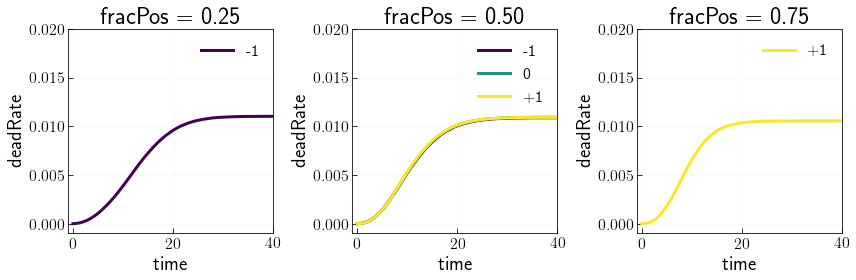

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
print_run([df_low_025, df_middle_025, df_high_025], labels, 'deadRate', ylim=(-0.001, 0.02))
plt.title('fracPos = 0.25')

plt.subplot(1, 3, 2)
print_run([df_low_050, df_middle_050, df_high_050], labels, 'deadRate', ylim=(-0.001, 0.02))
plt.title('fracPos = 0.50')

plt.subplot(1, 3, 3)
print_run([df_low_075, df_middle_075, df_high_075], labels, 'deadRate', ylim=(-0.001, 0.02))
plt.title('fracPos = 0.75')
plt.tight_layout()

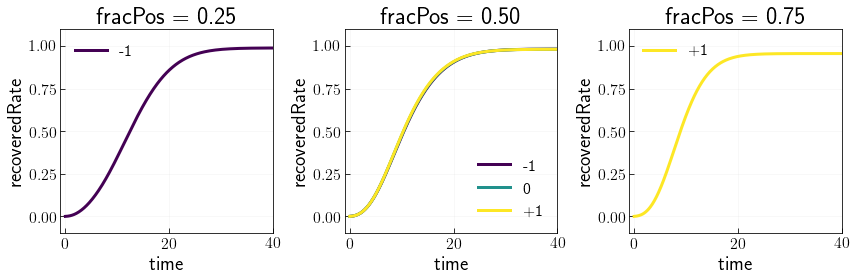

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
print_run([df_low_025, df_middle_025, df_high_025], labels, 'recoveredRate')
plt.title('fracPos = 0.25')

plt.subplot(1, 3, 2)
print_run([df_low_050, df_middle_050, df_high_050], labels, 'recoveredRate')
plt.title('fracPos = 0.50')

plt.subplot(1, 3, 3)
print_run([df_low_075, df_middle_075, df_high_075], labels, 'recoveredRate')
plt.title('fracPos = 0.75')
plt.tight_layout()